<a href="https://colab.research.google.com/github/phoebbbbe/Data-Statistics/blob/main/108AC1026_%E9%AB%98%E4%B8%AD%E7%95%A2%E6%A5%AD%E7%94%9F%E7%99%BC%E5%B1%95%E7%B5%B1%E8%A8%88%E8%88%87%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import requests
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.font_manager import fontManager
import plotly.graph_objects as go
from plotly.offline import plot
from plotly.subplots import make_subplots

### Step1. 爬取資料

In [ ]:
# 統計年份
years = [f'{year}' for year in range(102, 110)]


In [ ]:
# 取得102-109年高中畢業生升學慨況資料
university_url = {}
for year in years:
    if int(year) < 106:
        university_url[year] = f'https://stats.moe.gov.tw/files/investigate/high_graduate/{year}/{year}_1-2-1.csv'
    else:
        university_url[year] = f'https://stats.moe.gov.tw/files/investigate/high_graduate/{year}/{year}_1_2_1.csv'

university_df = {}
for item in university_url.items():
    university_df[item[0]] = pd.read_csv(item[1])


In [ ]:
# 取得102-109年高中畢業生就業情況資料
job_url = {}
for year in years:
    if int(year) < 106:
        job_url[year] = f'https://stats.moe.gov.tw/files/investigate/high_graduate/{year}/{year}_1-2-2.csv'
    else:
        job_url[year] = f'https://stats.moe.gov.tw/files/investigate/high_graduate/{year}/{year}_1_2_2.csv'

job_df = {}
for item in job_url.items():
    job_df[item[0]] = pd.read_csv(item[1])


In [ ]:
# 取得88-91年出生人口資料
!gdown --id '1-eiTxXCvqy7KX7mc6-ECdrPbYXc7Fh0o' --output born88.csv
!gdown --id '1-eY6-_se9muiNyccQPvXJUW1c3SFNiqm' --output born89.csv
!gdown --id '1-dcG2VZVwrgNNdxWNuavYB7_vSMLm0vq' --output born90.csv
!gdown --id '1-fM8EtGclAsMTOOTLk3AYtqbijJB9KHI' --output born91.csv

!ls

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-eiTxXCvqy7KX7mc6-ECdrPbYXc7Fh0o
To: /content/born88.csv
100% 576/576 [00:00<00:00, 2.17MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-eY6-_se9muiNyccQPvXJUW1c3SFNiqm
To: /content/born89.csv
100% 576/576 [00:00<00:00, 2.42MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-dcG2

In [ ]:
born_years = [f'{year}' for year in range(88, 92)]

born_df = {}
for year in born_years:
    born_df[year] = pd.read_csv(f'born{year}.csv', na_values='-', thousands=',').fillna(0)

In [ ]:
# 取得103-110年科系與新生人數
!gdown --id '1-UcZzIskNF9M16fBTSEd60A6p0C_fuP8' --output student103.csv
!gdown --id '1-dVq57Rygidp82Qob_Mv7BBaewoRlCWi' --output student104.csv
!gdown --id '1-_RmLAgZFKN9XSBBPW05UZo9oRk6Z1hD' --output student105.csv
!gdown --id '1-cFY1ay43zudWc1-TxGHmCcR7HiZwaAX' --output student106.csv
!gdown --id '1-UeAVN5WE1GRSxVX3uOEffehmz0se4Zj' --output student107.csv
!gdown --id '1-b4LHDbip7Ld5zcB65AQhhYp_uu5Br_4' --output student108.csv
!gdown --id '1-XYPK1GKqYIBNqQVrJS6wJKjgdnTc7g5' --output student109.csv
!gdown --id '1-_rD1ZRmKFLqwF1endxo6L6BWyPsmNNf' --output student110.csv

!ls

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-UcZzIskNF9M16fBTSEd60A6p0C_fuP8
To: /content/student103.csv
100% 1.29M/1.29M [00:00<00:00, 110MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-dVq57Rygidp82Qob_Mv7BBaewoRlCWi
To: /content/student104.csv
100% 1.21M/1.21M [00:00<00:00, 133MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.co

In [ ]:
go_university_years = [f'{year}' for year in range(103, 111)]

student_df = {}
for year in go_university_years:
    student_df[year] = pd.read_csv(f'./student{year}.csv', na_values='-',thousands=',').fillna(0)

### Step2. 統計資料

In [ ]:
dataset = {
    '年份': [],
    '畢業生': [],
    '就業人數': [],
    '升學人數': [],
    '其他': [],
}

for year in years:
    # 畢業生人數
    n_graduates = job_df[year]['畢業生人數'].sum()

    # 就業人數
    n_employees = job_df[year].iloc[:, 4:23].sum().sum()

    # 升學人數
    n_educates = university_df[year].iloc[:, 4:17].sum().sum()

    # 其他
    n_others = n_graduates - n_employees - n_educates

    dataset['年份'].append(year)
    dataset['畢業生'].append(n_graduates)
    dataset['就業人數'].append(n_employees)
    dataset['升學人數'].append(n_educates)
    dataset['其他'].append(n_others)

In [ ]:
df = pd.DataFrame(dataset)
df

,年份,畢業生,就業人數,升學人數,其他
0,102,255319,20885,221519,12915
1,103,272563,30970,225514,16079
2,104,250172,28901,206481,14790
3,105,233642,27273,193393,12976
4,106,241288,27995,199399,13894
5,107,231022,25761,190414,14847
6,108,202221,21294,170239,10688
7,109,191909,18037,165387,8485


In [ ]:
born_dataset = {
    '年份': [],
    '出生人數': []
}

for year in born_years:
    born_dataset['年份'].append(year)
    born_dataset['出生人數'].append(born_df[year].loc[25, '總計'])
born_df = pd.DataFrame(born_dataset)
born_df

,年份,出生人數
0,88,283661
1,89,305312
2,90,260354
3,91,247530


In [ ]:
department_df = {}
departments = {}
department_five_df = {}
departments_five = {}

for year in go_university_years:
    condition = (student_df[year]['等級別'] == 'B 學士')|(student_df[year]['等級別'] == 'B 四技')
    department_df[year] = student_df[year][condition].iloc[:, [3,6,7,8,9,10]]
    department_df[year]['科系名稱'] = department_df[year]['科系名稱'].str.replace('學系', '系')
    department_df[year]['新生人數'] = department_df[year]['一年級男生'] + department_df[year]['一年級女生']
    department_five_df[year] = department_df[year]
    department_df[year] = department_df[year].groupby('科系名稱')['新生人數'].sum().sort_values(ascending=False).head(20)
    department_five_df[year] = department_five_df[year].groupby('科系名稱')['新生人數'].sum().sort_values(ascending=False).head(5)
    departments[year] = list(department_df[year].index)
    departments_five[year] = list(department_five_df[year].index)

department_dict = {}
for year in go_university_years:
    department_dict[year] = list(department_df[year].values)

department_five_dict = {}
for year in go_university_years:
    department_five_dict[year] = list(department_five_df[year].values)


In [ ]:
department_five_df = pd.DataFrame(department_five_df).T
department_five_df.index.name = '年份'
department_five_df.columns.name = '系別'
department_five_df

系別,企業管理系,機械工程系,資訊工程系,資訊管理系,電機工程系
年份,,,,,
103,8680.0,5209.0,5883.0,8378.0,5895.0
104,9780.0,6664.0,6485.0,9633.0,7199.0
105,8395.0,6383.0,5311.0,7803.0,6487.0
106,8075.0,6663.0,5818.0,7249.0,6713.0
107,8121.0,6770.0,5883.0,6819.0,6794.0
108,7674.0,6779.0,5786.0,6632.0,7037.0
109,7358.0,6159.0,5873.0,6379.0,7039.0
110,7093.0,5782.0,6031.0,6129.0,6782.0


### Step3. 繪製數據圖表

##### 102-109畢業生堆疊圖

In [ ]:
# 下載Google-思源正黑體
!wget --content-disposition https://fonts.google.com/download?family=Noto%20Sans%20TC
!unzip 'Noto_Sans_TC.zip'  #解壓縮到主機目錄

--2023-06-15 09:19:41--  https://fonts.google.com/download?family=Noto%20Sans%20TC
Resolving fonts.google.com (fonts.google.com)... 108.177.97.102, 108.177.97.138, 108.177.97.101, ...
Connecting to fonts.google.com (fonts.google.com)|108.177.97.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘Noto_Sans_TC.zip.4’

Noto_Sans_TC.zip.4      [<=>                 ]       0  --.-KB/s               ^C
Archive:  Noto_Sans_TC.zip
replace OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

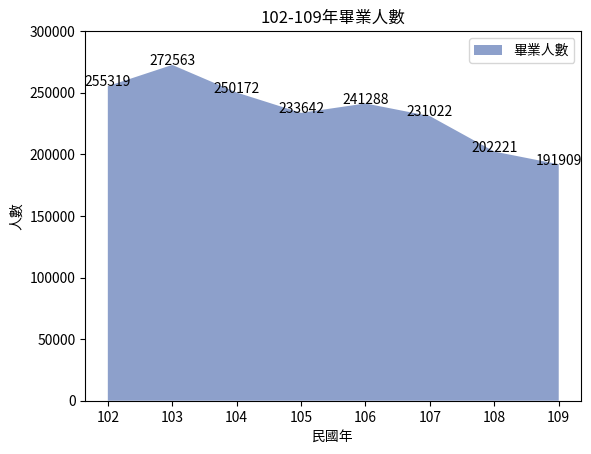

In [ ]:
labels = ['畢業人數']
colors = ['#8da0cb']

# 加入中文字型設定：Google-思源正黑體
fontManager.addfont('NotoSansTC-Regular.otf')
matplotlib.rc('font', family='Noto Sans TC')

plt.stackplot(df['年份'], df['畢業生'], labels=labels, colors=colors)

for i in range(len(df['年份'])):
    plt.text(df['年份'][i], df['畢業生'][i]+ 0.3, str(df['畢業生'][i]), ha='center')

plt.ylim(0, 300000)
plt.title('102-109年畢業人數')
plt.xlabel('民國年')
plt.ylabel('人數')
plt.legend(loc='upper right')
plt.show()

##### 102-109畢業生統計互動式折線圖

In [ ]:
fig = go.Figure(data=go.Scatter(x=df['年份'], y=df['畢業生'], mode='lines+markers', name='Data'))

fig.update_layout(
    title='102-109年 畢業生人數統計',
    xaxis_title='民國年',
    yaxis_title='人數'
)

fig.show()

##### 88-91年出生人數與106-109年畢業人數關係圖

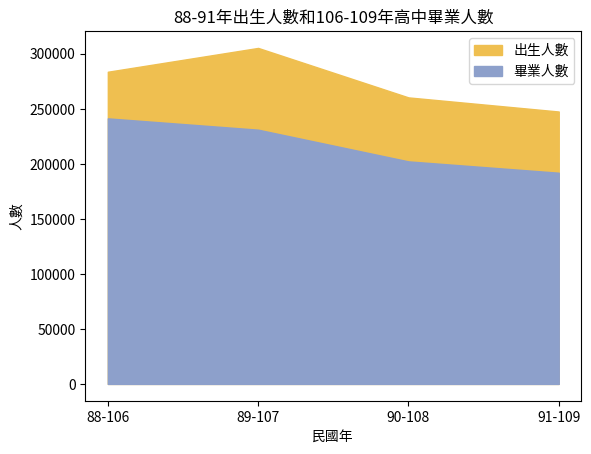

In [ ]:
plt.cla()
x = ['88-106', '89-107', '90-108', '91-109']
y1 = df.loc[4:8, '畢業生']
y2 = born_df['出生人數']

# 加入中文字型設定：Google-思源正黑體
fontManager.addfont('NotoSansTC-Regular.otf')
matplotlib.rc('font', family='Noto Sans TC')

plt.fill_between(x, y2, label='出生人數',color='#efbf50')
plt.fill_between(x, y1, label='畢業人數', color='#8da0cb')

plt.title('88-91年出生人數和106-109年高中畢業人數')
plt.xlabel('民國年')
plt.ylabel('人數')
plt.legend()
plt.show()

In [ ]:
x = ['88-106', '89-107', '90-108', '91-109']
y1 = df.loc[4:8, '畢業生']
y2 = born_df['出生人數']

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=x, y=y1, mode='lines+markers', name='畢業生')
)
fig.add_trace(
    go.Scatter(x=x, y=y2, mode='lines+markers', name='出生人口')
)
fig.update_layout(
    title='88-91年出生人數和106-109年高中畢業人數',
    xaxis_title='民國年',
    yaxis_title='人數',
)

fig.show()

##### 102-109年畢業生就業與升學人數堆疊圖

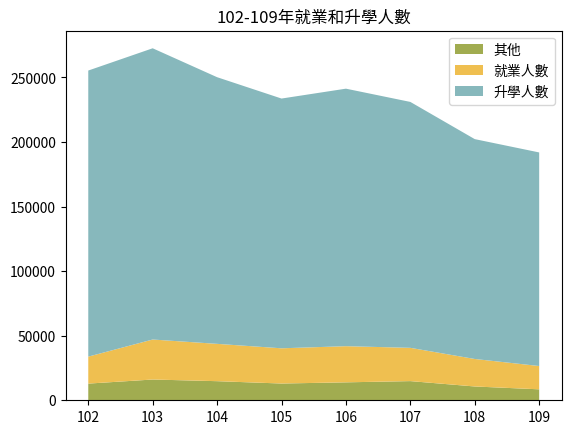

In [ ]:
plt.cla()
labels = ['其他', '就業人數', '升學人數', ]
colors = ['#a1ac50', '#efbf50', '#87b8bc']

# 加入中文字型設定：Google-思源正黑體
fontManager.addfont('NotoSansTC-Regular.otf')
matplotlib.rc('font', family='Noto Sans TC')

plt.stackplot(
    df['年份'],
    df['其他'],
    df['就業人數'],
    df['升學人數'],
    labels=labels,
    colors=colors,
)

plt.title('102-109年就業和升學人數')
plt.legend(loc='upper right')
plt.show()

In [ ]:
df

,年份,畢業生,就業人數,升學人數,其他
0,102,255319,20885,221519,12915
1,103,272563,30970,225514,16079
2,104,250172,28901,206481,14790
3,105,233642,27273,193393,12976
4,106,241288,27995,199399,13894
5,107,231022,25761,190414,14847
6,108,202221,21294,170239,10688
7,109,191909,18037,165387,8485


In [ ]:
all = df['畢業生'].sum()
rate_university = f"{(df['升學人數'].sum() / all) * 100 :.2f}%"
rate_employee = f"{(df['就業人數'].sum() / all) * 100 :.2f}%"
rate_other = f"{(df['其他'].sum() / all) * 100 :.2f}%"
print(rate_university)
print(rate_employee)
print(rate_other)


83.72%
10.71%
5.57%


##### 102-109年高中畢業生就業和升學人數表格

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='lightgrey',
                align='left'),
    cells=dict(values=df.T,
               fill_color='white',
               align='left'))
])

fig.update_layout(title='102-109年高中畢業生就業和升學人數')
fig.show()


##### 103-110年 5大科系人數變化互動式折線圖

In [ ]:
# fig = go.Figure(data=go.Scatter(x=department_five_df.index, y=department_five_df['企業管理系'], mode='lines+markers', name='Data'))

trace1 = go.Scatter(x=department_five_df.index, y=department_five_df['企業管理系'], mode='lines+markers', name='企業管理系')
trace2 = go.Scatter(x=department_five_df.index, y=department_five_df['資訊管理系'], mode='lines+markers', name='資訊管理系')
trace3 = go.Scatter(x=department_five_df.index, y=department_five_df['電機工程系'], mode='lines+markers', name='電機工程系')
trace4 = go.Scatter(x=department_five_df.index, y=department_five_df['機械工程系'], mode='lines+markers', name='機械工程系')
trace5 = go.Scatter(x=department_five_df.index, y=department_five_df['資訊工程系'], mode='lines+markers', name='資訊工程系')

data = [trace1, trace2, trace3, trace4, trace5]
fig = go.Figure(data)


fig.update_layout(
    title='103-110年 前五大科系人數統計',
    xaxis_title='民國年',
    yaxis_title='人數'
)
fig.show()

In [ ]:
for year in go_university_years:
    labels = departments[year]
    values = department_dict[year]
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(
        title=f'{year}年各科系人數統計',
        xaxis_title='科系',
        yaxis_title='人數比例'
    )
    fig.show()


##### 102-109年 高中畢業生就業類別人數變化直方動畫圖

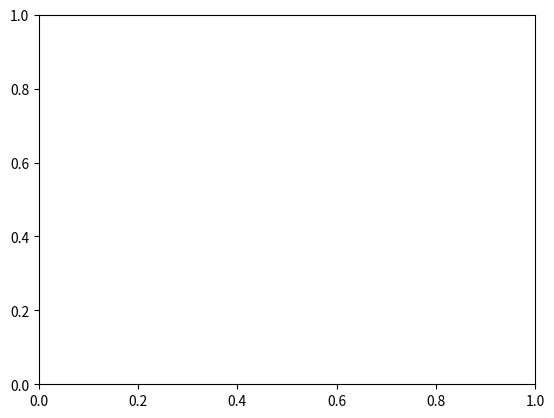

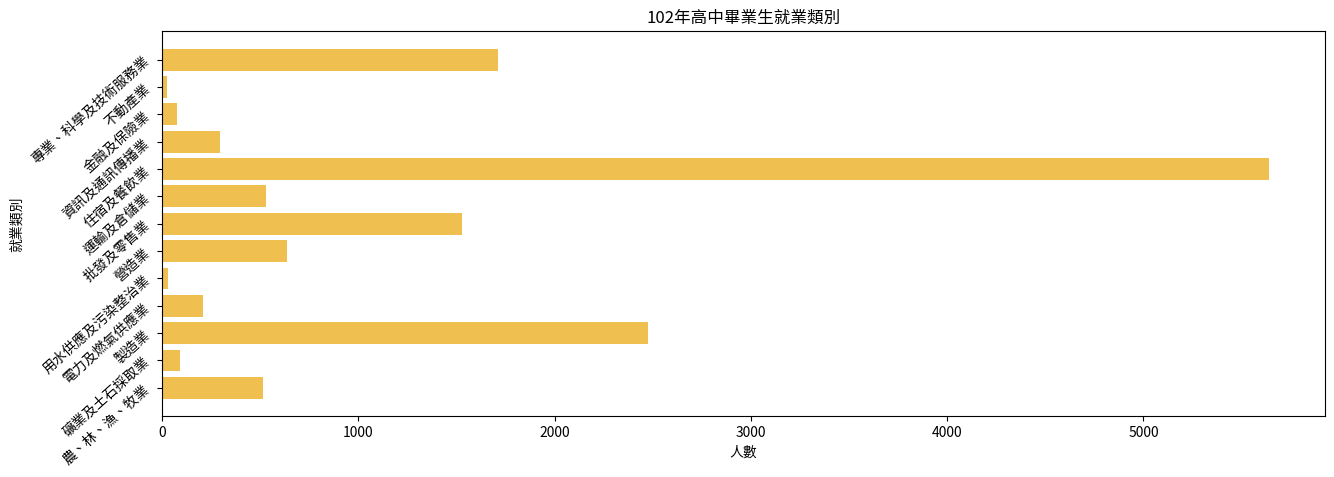

In [ ]:
# 就業類別
columns = list(job_df['102'].iloc[:, 4:17].columns)
jobs = []
for col in columns:
    jobs.append(col[1:-2].replace("_","、"))
dataset2 = {}

for year in years:
    dataset2[int(year)] = list(job_df[year].iloc[:, 4:17].sum().values)

dataset2 = pd.DataFrame(dataset2)

# 作圖
plt.cla()
fig, ax = plt.subplots(figsize=(15, 5))

start_year = 102

# 初始bar圖
bar = ax.barh(jobs, dataset2[start_year], color="#efbf50")

def update_barh(i):
    year = start_year + i

    # 更新bar圖的數據
    for rect, h in zip(bar, dataset2[year]):
        rect.set_width(h)
    ax.set_title(f'{year}年高中畢業生就業類別')

# 創建動畫效果
anim = FuncAnimation(fig, update_barh, frames=8, interval=2000, repeat=True)

# 加入中文字型設定：Google-思源正黑體
fontManager.addfont('NotoSansTC-Regular.otf')
matplotlib.rc('font', family='Noto Sans TC')

plt.xlabel('人數')
plt.ylabel('就業類別')
plt.yticks(range(len(jobs)), labels=jobs, rotation=42)

anim.save("./data8.mp4")

# plt.show()